<a href="https://colab.research.google.com/github/1280duck/plot_plate_boundary_pygmt/blob/main/pygmt_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [1]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

warning  libmamba [numpy-2.3.5-py312h33ff503_0] The following files were already present in the environment:
    - bin/f2py
    - bin/numpy-config


In [2]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.3.3
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


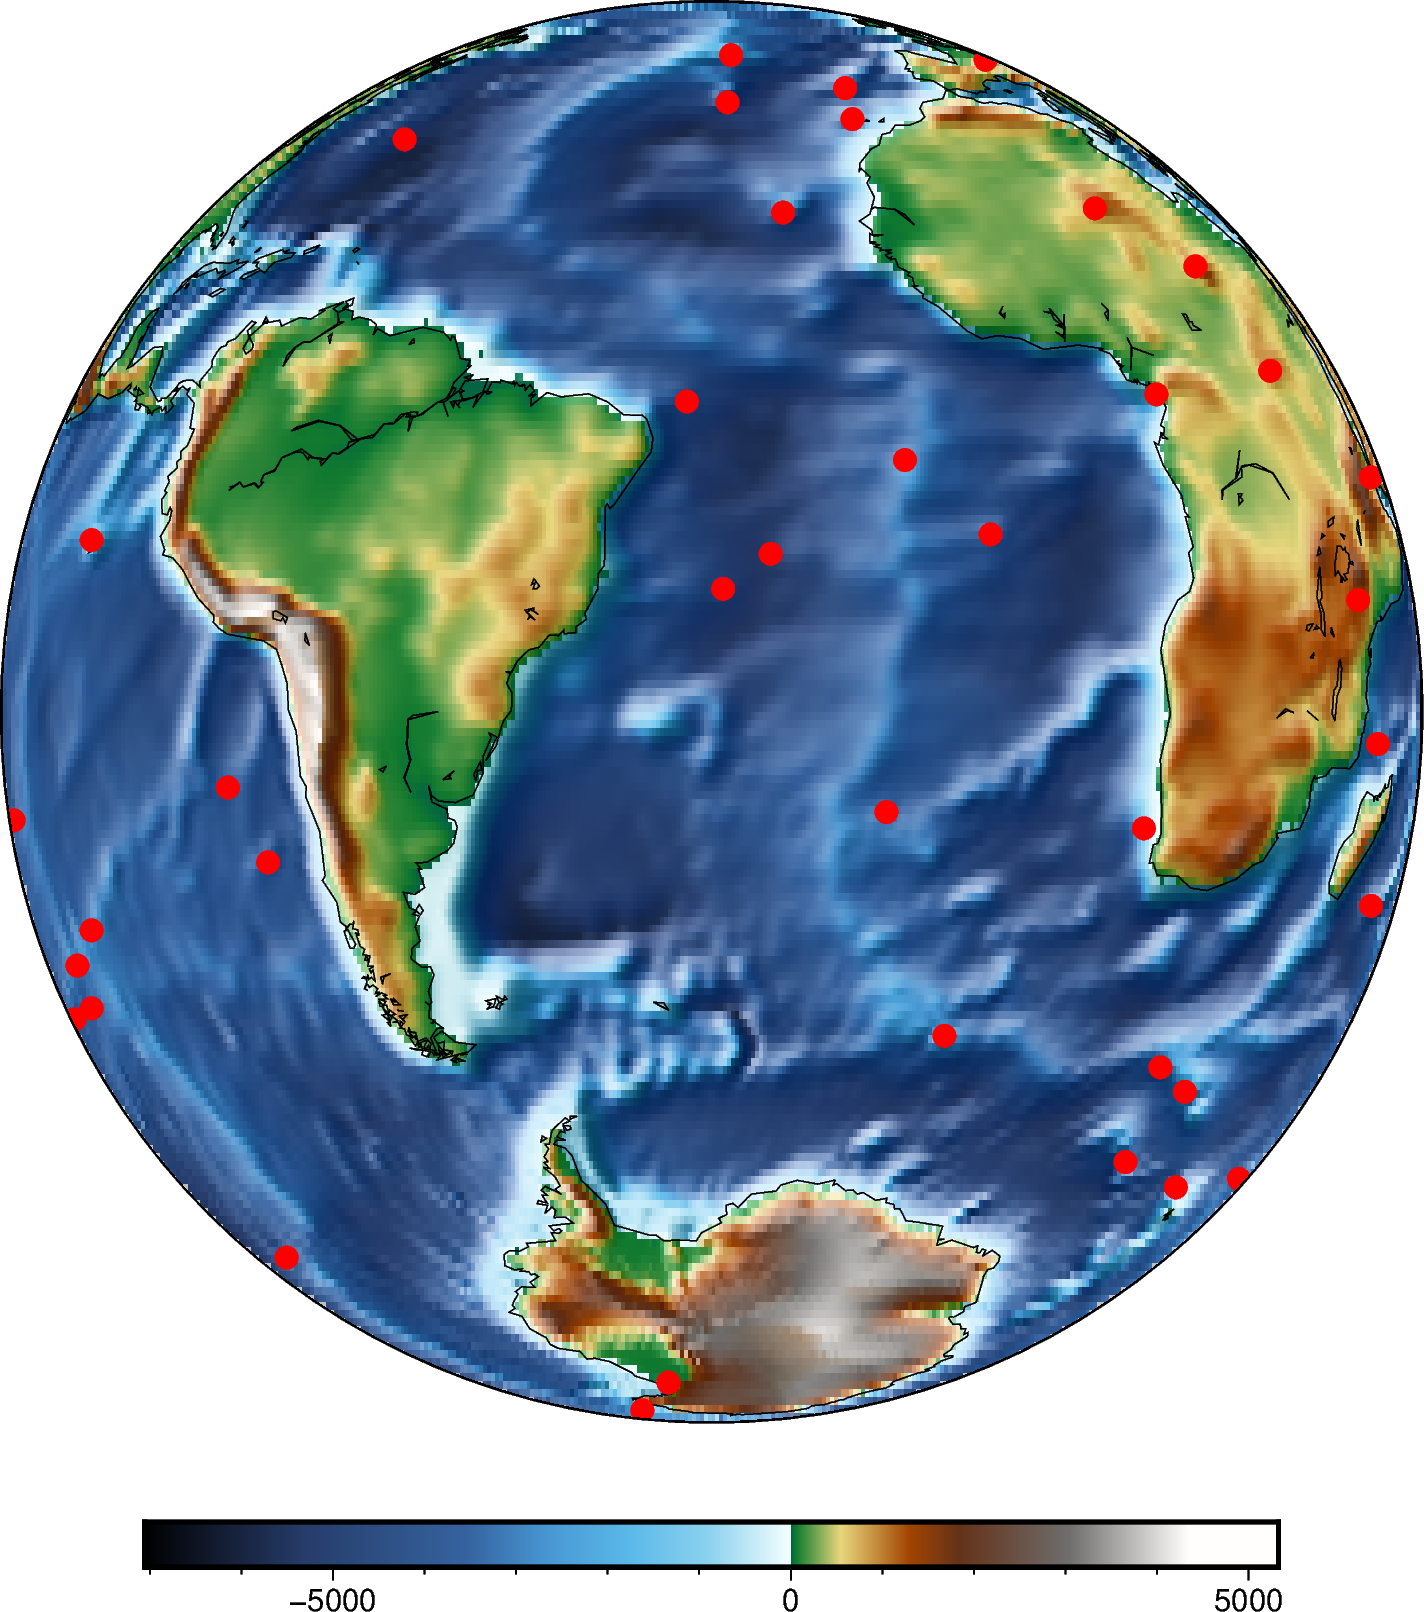

In [3]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

無法載入板塊邊界數據，跳過此圖層: module 'pygmt.datasets' has no attribute 'load_plate_boundaries'


plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


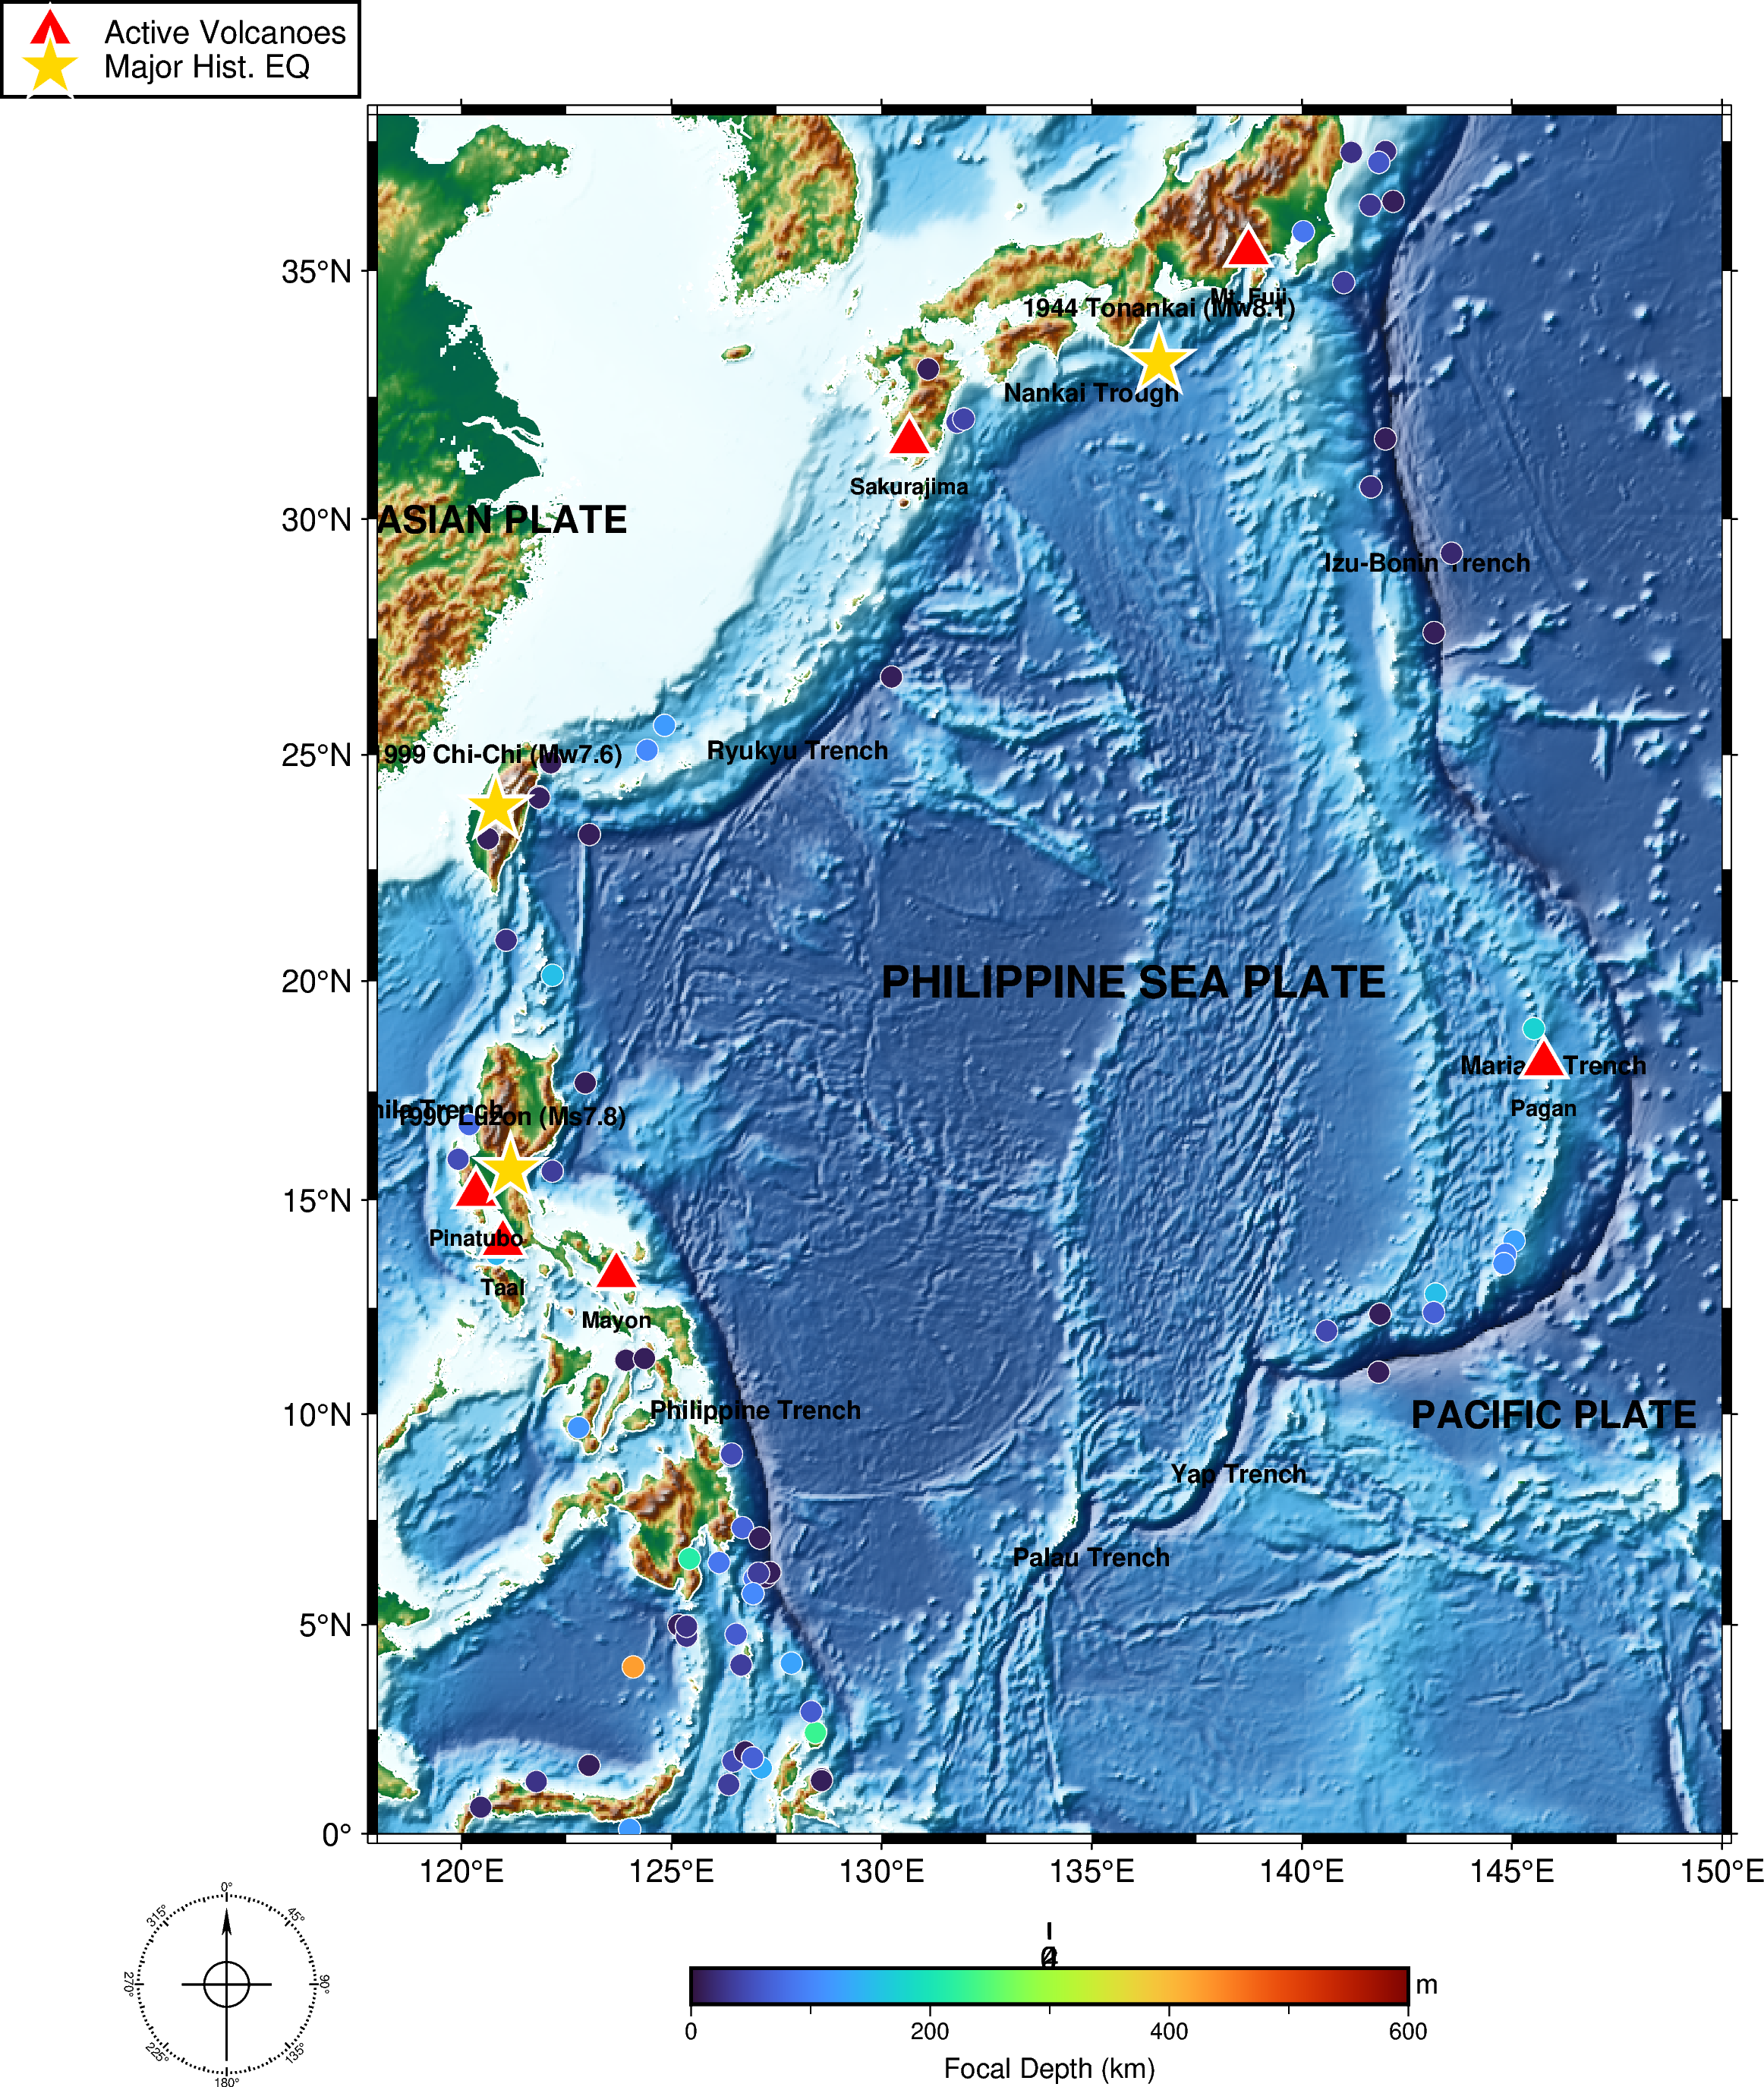

In [28]:
import pygmt
import pandas as pd

def map_psp_professional():
    # 1. 設定區域與基本參數
    # 範圍：包含日本南部、台灣、菲律賓群島及馬里亞納海溝
    region = [118, 150, 0, 38]
    projection = "M15c"

    fig = pygmt.Figure()

    # 全局字體設定：黑色，Helvetica
    with pygmt.config(FONT_LABEL="12p,Helvetica,black", FONT_TITLE="14p,Helvetica-Bold,black", FONT_ANNOT_PRIMARY="10p,Helvetica,black"):

        # -----------------------------------------------------------
        # 2. 地形與底圖 (Bathymetry) - 高解析度
        # -----------------------------------------------------------
        # 使用 @earth_relief_03m (3角分) 解析度較高
        # shading=True 增加立體感，這對顯示海溝 (Trench) 的深邃度至關重要
        fig.grdimage(
            grid="@earth_relief_03m",
            region=region,
            projection=projection,
            cmap="geo",
            shading=True
        )

        fig.coast(
            shorelines="1/0.5p,white", # 海岸線用白色細線，對比深色海洋
            borders=["1/0.5p,white"],  # 國界
            frame=["a5f2.5", "x+lLongitude", "y+lLatitude"] # 座標軸
        )

        # Add scale bar here
        # Corrected map_scale format: use a valid reference point + offset + length with unit + fancy style
        fig.basemap(map_scale="JBC+o0c/1c+w4ck+f", compass="JBL+w2c+o0.5c") # Changed +lk to +w4ck

        # -----------------------------------------------------------
        # 3. 板塊邊界 (Plate Boundaries - Bird, 2003 Model)
        # -----------------------------------------------------------
        # 這是地質學標準數據，紅線會準確沿著海溝與海脊行走
        try:
            # Explicitly load plate boundaries data
            plate_boundaries = pygmt.datasets.load_plate_boundaries()
            fig.plot(
                data=plate_boundaries,
                pen="2.5p,red",  # 紅色粗線
                label="Plate Boundary (Bird, 2003)"
            )
        except Exception as e:
            print(f"無法載入板塊邊界數據，跳過此圖層: {e}")

        # -----------------------------------------------------------
        # 4. 標註隱沒帶與海溝 (Subduction Zones / Trenches)
        # -----------------------------------------------------------
        # 使用白色粗體英文標示，定義 PSP 的邊界性質
        trenches = {
            'text': [
                "Nankai Trough", "Ryukyu Trench", "Manila Trench",
                "Philippine Trench", "Yap Trench", "Palau Trench",
                "Mariana Trench", "Izu-Bonin Trench"
            ],
            'lon': [135.0, 128.0, 119.0, 127.0, 138.5, 135.0, 146.0, 143.0],
            'lat': [32.5,  25.0,  17.0,  10.0,  8.5,   6.5,   18.0,  29.0]
            # Removed 'angle' as text will be horizontal
        }

        fig.text(
            x=trenches['lon'],
            y=trenches['lat'],
            text=trenches['text'],
            # Removed angle for horizontal text
            font="8p,Helvetica-Bold,black", # Reduced font size, changed to black
            justify="MC",
            offset="0c/0.05c" # Small offset to avoid overlap with line
        )

        # -----------------------------------------------------------
        # 5. 地震活動 (Seismicity) - 強化顯示
        # -----------------------------------------------------------
        try:
            usgs_url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv"
            df_eq = pd.read_csv(usgs_url)

            # 篩選範圍
            df_eq = df_eq[
                (df_eq.latitude >= region[2]) & (df_eq.latitude <= region[3]) &
                (df_eq.longitude >= region[0]) & (df_eq.longitude <= region[1])
            ]

            if not df_eq.empty:
                # Select only relevant columns (lon, lat, depth) and convert to NumPy array
                df_plot_eq = df_eq[['longitude', 'latitude', 'depth']].values

                # 製作深度色標 (CPT)
                pygmt.makecpt(cmap="turbo", series=[0, 600], output="depth.cpt", background=True)

                fig.plot(
                    data=df_plot_eq,   # Pass NumPy array directly
                    style="C0.25c",    # Use uppercase 'C' to tell GMT to color by 3rd column (depth)
                    cmap="depth.cpt",
                    pen="0.2p,white",  # 白色邊框增加對比
                    label="Eq M>4.5 (30d)"
                )

                # 色標
                fig.colorbar(
                    cmap="depth.cpt",
                    frame=["x+lFocal Depth (km)", "y+lm"],
                    position="JMB+o0c/1.5c+w8c/0.4c+h" # 底部置中
                )
        except Exception as e:
            print(f"USGS Data Fetch Error: {e}")

        # -----------------------------------------------------------
        # 6. 火山 (Volcanoes) - 強化顯示
        # -----------------------------------------------------------
        # 選取構造上的關鍵火山
        vols = {
            'name': ['Mt. Fuji', 'Sakurajima', 'Pinatubo', 'Taal', 'Mayon', 'Pagan'],
            'lon': [138.73, 130.66, 120.35, 120.99, 123.69, 145.76],
            'lat': [35.36, 31.59, 15.14, 14.00, 13.25, 18.13]
        }

        fig.plot(
            x=vols['lon'],
            y=vols['lat'],
            style="t0.6c",    # 三角形加大至 0.6cm
            fill="red",      # 紅色填充
            pen="1p,white",   # 白色邊框
            label="Active Volcanoes"
        )
        # 標註火山名稱
        fig.text(
            x=vols['lon'],
            y=vols['lat'],
            text=vols['name'],
            font="7p,Helvetica-Bold,black", # Reduced font size
            justify="TC",
            offset="0c/-0.4c"
        )

        # -----------------------------------------------------------
        # 7. 歷史著名地震 (Historical Major Earthquakes)
        # -----------------------------------------------------------
        hist_eq = {
            'name': ['1999 Chi-Chi (Mw7.6)', '1990 Luzon (Ms7.8)', '1944 Tonankai (Mw8.1)'],
            'lon': [120.82, 121.17, 136.6],
            'lat': [23.85, 15.7, 33.2],
        }

        fig.plot(
            x=hist_eq['lon'],
            y=hist_eq['lat'],
            style="a0.8c",   # 星形加大至 0.8cm
            fill="gold",
            pen="1p,white",
            label="Major Hist. EQ"
        )

        fig.text(
            x=hist_eq['lon'],
            y=hist_eq['lat'],
            text=hist_eq['name'],
            font="8p,Helvetica-Bold,black", # Reduced font size
            justify="BC",
            offset="0c/0.5c"
        )

        # -----------------------------------------------------------
        # 8. 板塊名稱標註 (Plate Labels)
        # -----------------------------------------------------------
        # 使用黑色大字
        fig.text(x=136, y=20, text="PHILIPPINE SEA PLATE", font="14p,Helvetica-Bold,black", justify="MC") # Reduced font size
        fig.text(x=146, y=10, text="PACIFIC PLATE", font="12p,Helvetica-Bold,black", justify="MC") # Reduced font size
        fig.text(x=120, y=30, text="EURASIAN PLATE", font="12p,Helvetica-Bold,black", justify="MC") # Reduced font size

        # 圖例 (Changed background to white for better visibility of black text)
        fig.legend(position="JTL+o0.2c", box="+gwhite+p1p,black")

        # Removed fig.title as requested, as titles are often external to the plot area
        # fig.text(position="TL", font="18p,Helvetica-Bold,black", text="Tectonic Setting: Philippine Sea Plate", no_clip=True) # Positioned at Top Left

        fig.savefig("PSP_Professional_Map.png")
        fig.show()

if __name__ == "__main__":
    map_psp_professional()


### 🌊 Aproveite o PyGMT 🌍  
Crie mapas e figuras incríveis diretamente no seu **notebook do Colab** —  
com o poder do **PyGMT 0.17.0**, **GMT** e **Python 3.12**. Veja mais exemplos em [**Recursos Externos do PyGMT**](https://www.pygmt.org/v0.17.0/external_resources.html).

> _Boas mapas!_ 🗺️
